In [1]:
import os
import pandas as pd
from constants import *
import numpy as np
import matplotlib.pyplot as plt
from stroke import *

In [2]:
pathToCVSData = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV'

In [3]:
listStrokesTrain = []
listStrokesValidation = []

for folder in sorted(os.listdir(pathToCVSData)):
    pathToFolder = os.path.join(pathToCVSData, folder)
    if folder == "train":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesTrain.append(stroke)

    if folder == "validation":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesValidation.append(stroke)

In [4]:
print(listStrokesTrain[14].id)

6919410891.csv


In [5]:
# Remplacer les 0.0 par NaN
listStrokesTrain[14].data[listStrokesTrain[14].data == 0.0] = np.nan

# Identifier les passages à zéro
zero_transitions = listStrokesTrain[14].data.isnull() & listStrokesTrain[14].data.shift(-1).notnull()

# Appliquer l'interpolation sur les passages à zéro
listStrokesTrain[14].data[zero_transitions] = listStrokesTrain[14].data.interpolate(method='linear')

In [11]:
for c in listStrokesTrain[14].data.columns:
    removePeaks(listStrokesTrain[14], c, 30)

<Axes: >

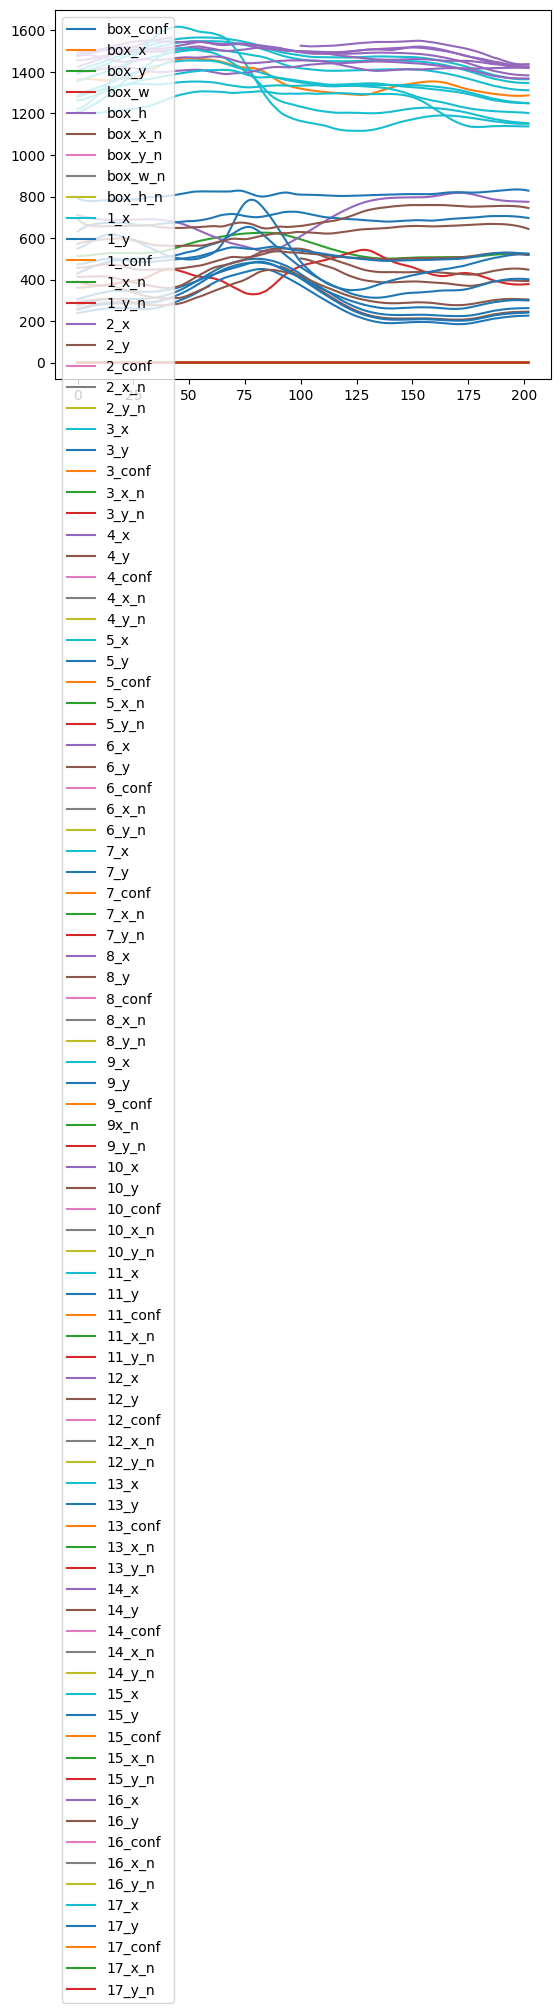

In [12]:
listStrokesTrain[14].data.plot()

10410755888.csv
Defensive Backhand Backspin
10644410824.csv
Defensive Backhand Backspin
115268294.csv
Defensive Backhand Backspin
1431034833.csv
Defensive Backhand Backspin
2289610766.csv
Defensive Backhand Backspin
3101413152.csv
Defensive Backhand Backspin
351154895.csv
Defensive Backhand Backspin
357494546.csv
Defensive Backhand Backspin
4102951825.csv
Defensive Backhand Backspin
45710692103.csv
Defensive Backhand Backspin
47310101010310.csv
Defensive Backhand Backspin
510377410510.csv
Defensive Backhand Backspin
5545916710.csv
Defensive Backhand Backspin
5857686108.csv
Defensive Backhand Backspin
6919410891.csv
Defensive Backhand Backspin
7641017885.csv
Defensive Backhand Backspin


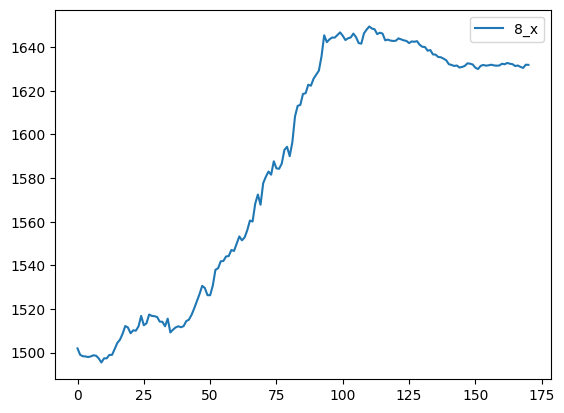

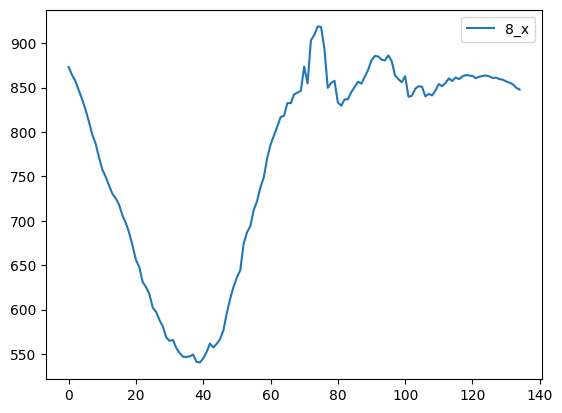

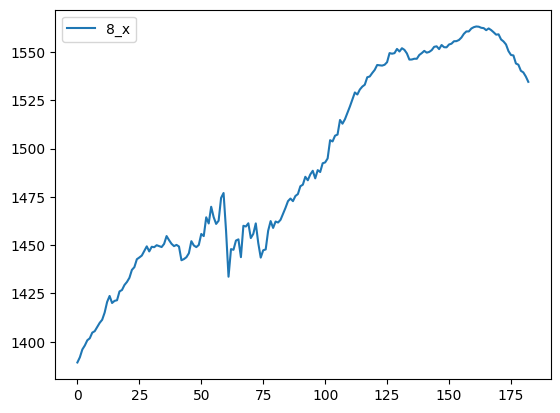

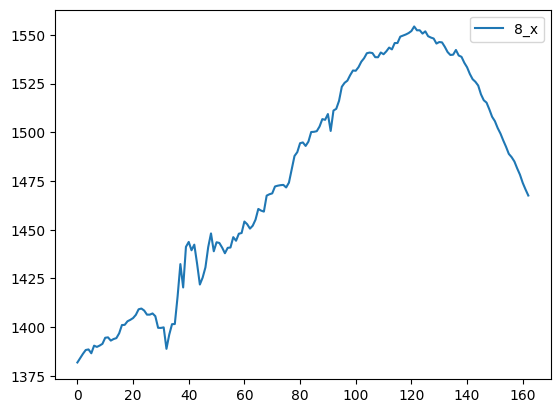

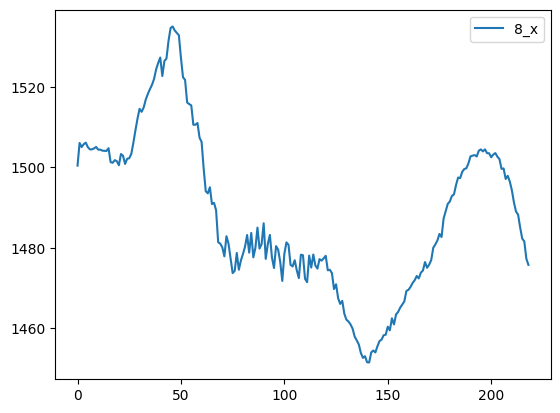

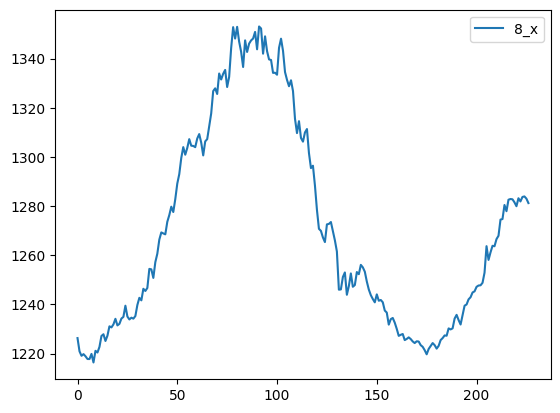

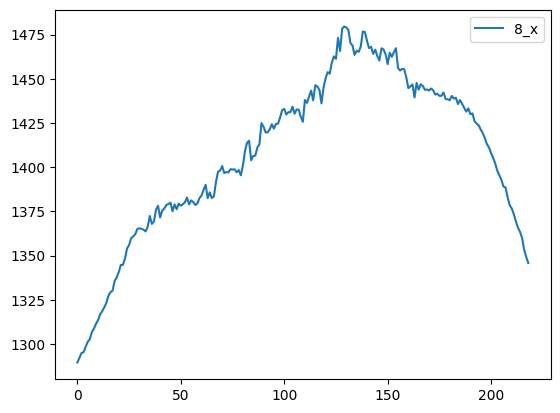

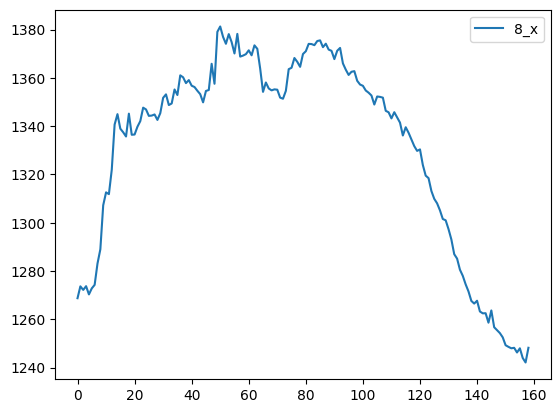

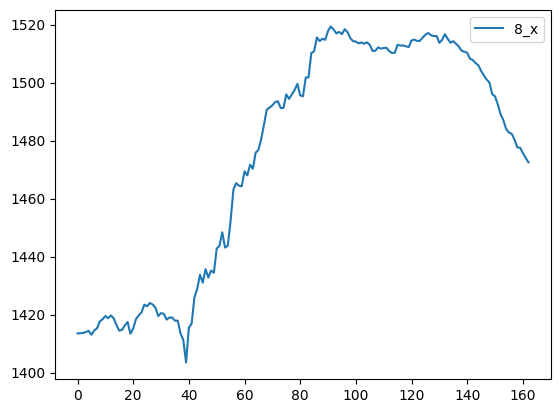

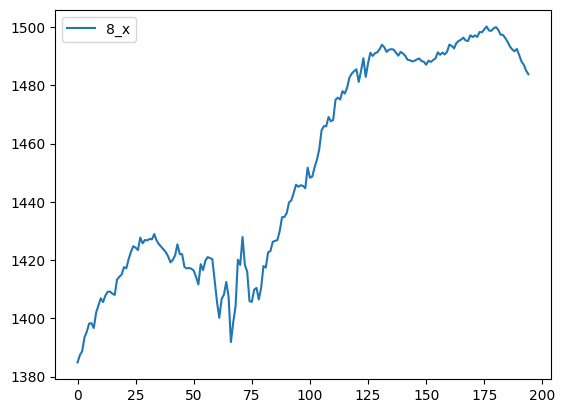

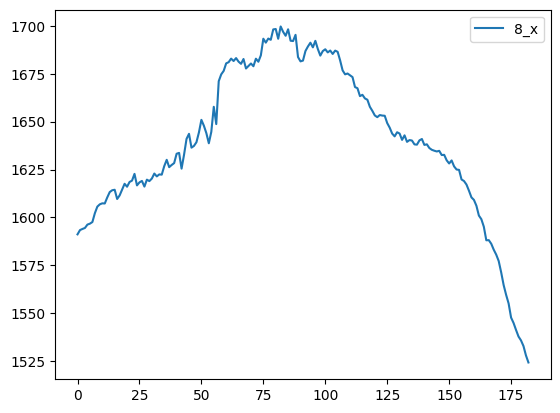

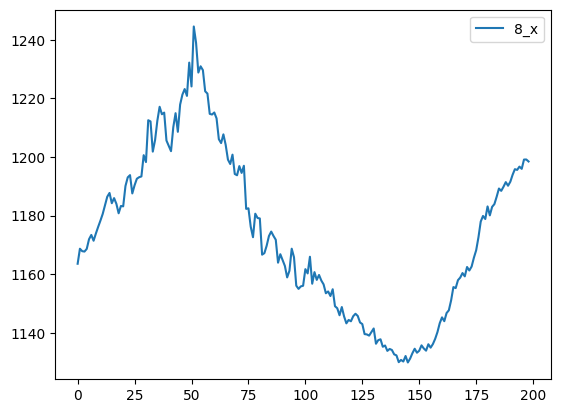

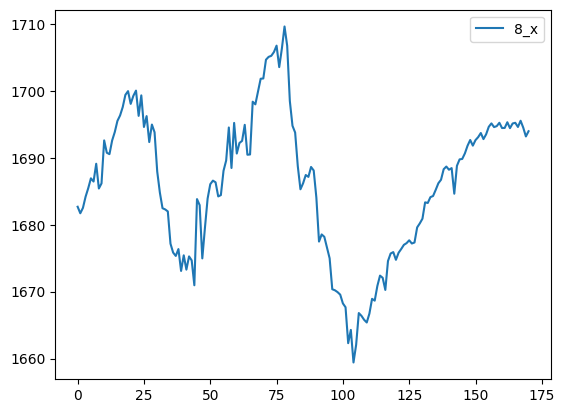

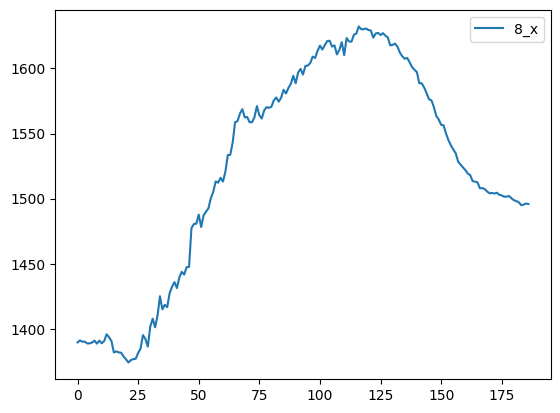

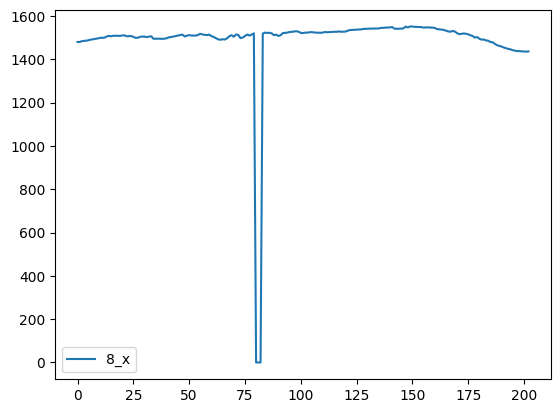

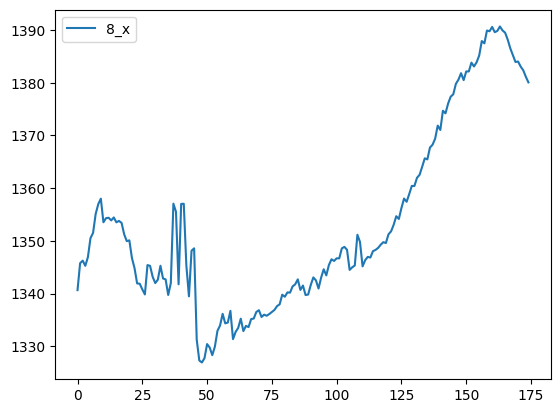

In [7]:
for i in range(len(listStrokesTrain)):
    if i<=15:
        listStrokesTrain[i].plotStroke("8_x")
        print(listStrokesTrain[i].id)
        print(listStrokesTrain[i].label)

In [8]:
def removePeaks(stroke, dataColumn, windowSize):
    stroke.data[dataColumn] = savgol_filter(stroke.data[dataColumn], min(len(stroke.data), windowSize), 4) 

In [15]:
s = listStrokesTrain[0]
print(s.data.columns)

for c in s.data.columns:
    print(s.data[c])

Index(['box_conf', 'box_x', 'box_y', 'box_w', 'box_h', 'box_x_n', 'box_y_n',
       'box_w_n', 'box_h_n', '1_x', '1_y', '1_conf', '1_x_n', '1_y_n', '2_x',
       '2_y', '2_conf', '2_x_n', '2_y_n', '3_x', '3_y', '3_conf', '3_x_n',
       '3_y_n', '4_x', '4_y', '4_conf', '4_x_n', '4_y_n', '5_x', '5_y',
       '5_conf', '5_x_n', '5_y_n', '6_x', '6_y', '6_conf', '6_x_n', '6_y_n',
       '7_x', '7_y', '7_conf', '7_x_n', '7_y_n', '8_x', '8_y', '8_conf',
       '8_x_n', '8_y_n', '9_x', '9_y', '9_conf', '9x_n', '9_y_n', '10_x',
       '10_y', '10_conf', '10_x_n', '10_y_n', '11_x', '11_y', '11_conf',
       '11_x_n', '11_y_n', '12_x', '12_y', '12_conf', '12_x_n', '12_y_n',
       '13_x', '13_y', '13_conf', '13_x_n', '13_y_n', '14_x', '14_y',
       '14_conf', '14_x_n', '14_y_n', '15_x', '15_y', '15_conf', '15_x_n',
       '15_y_n', '16_x', '16_y', '16_conf', '16_x_n', '16_y_n', '17_x', '17_y',
       '17_conf', '17_x_n', '17_y_n'],
      dtype='object')
0      0.932318
1      0.934119
2      0.

In [13]:
for stroke in listStrokesTrain:
    # Remplacer les 0.0 par NaN
    stroke.data[stroke.data == 0.0] = np.nan

    # Identifier les passages à zéro
    zero_transitions = stroke.data.isnull() & stroke.data.shift(-1).notnull()

    # Appliquer l'interpolation sur les passages à zéro
    stroke.data[zero_transitions] = stroke.data.interpolate(method='linear')
    #for c in stroke.data.columns:
        #removePeaks(stroke, c, 20)

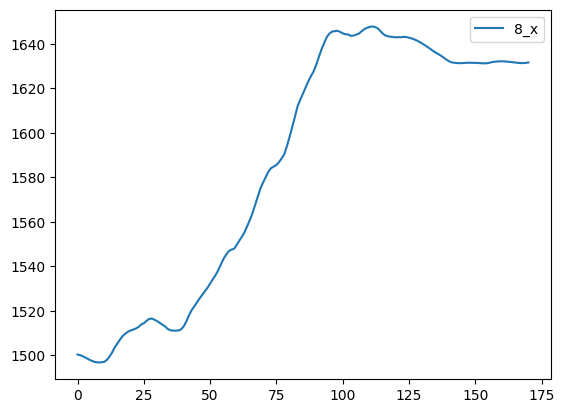

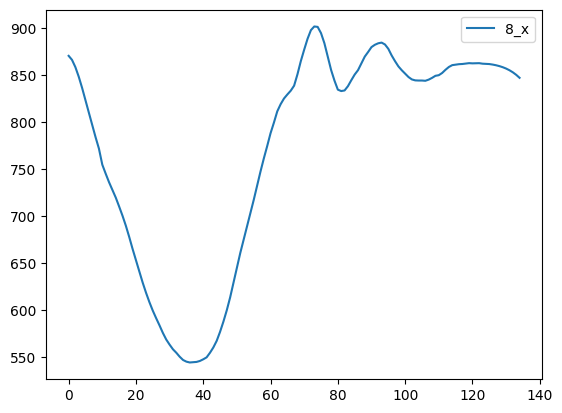

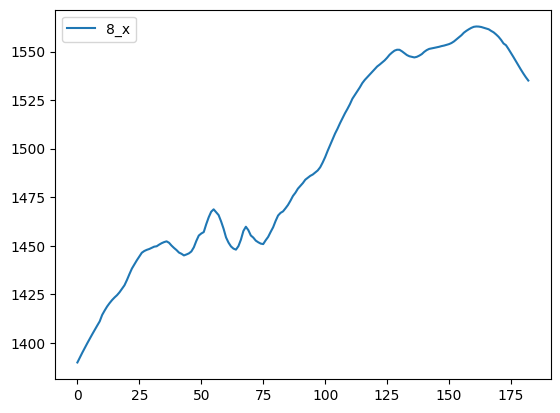

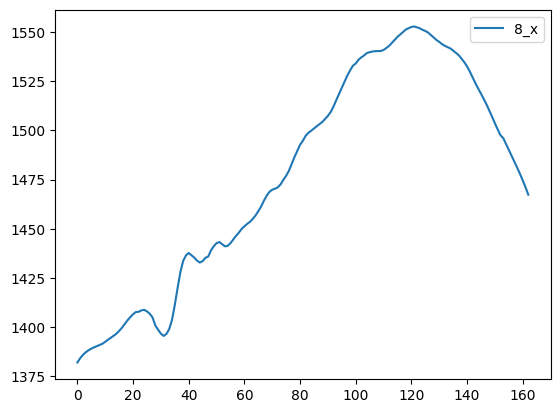

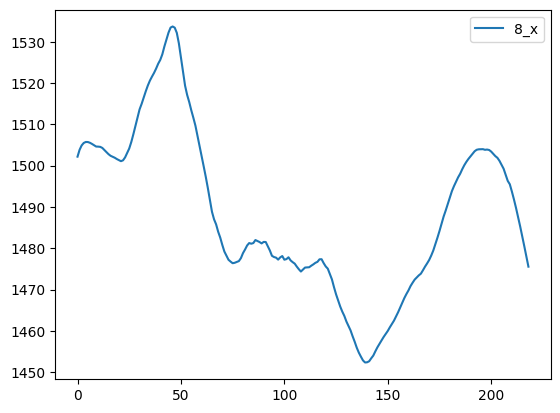

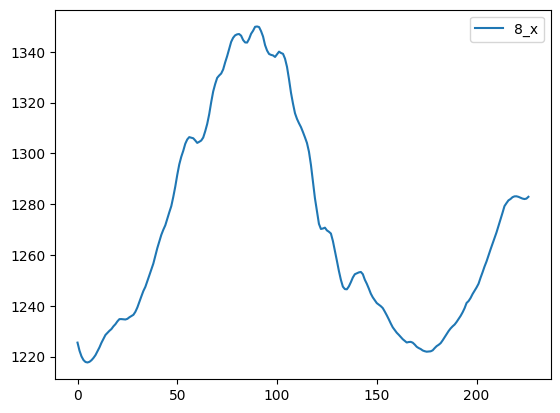

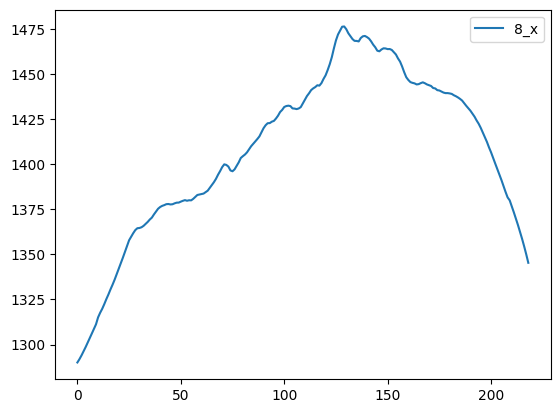

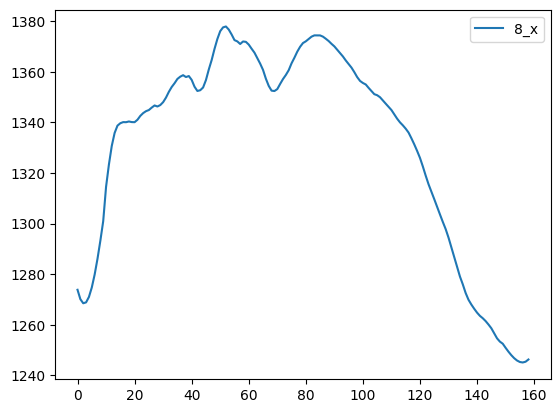

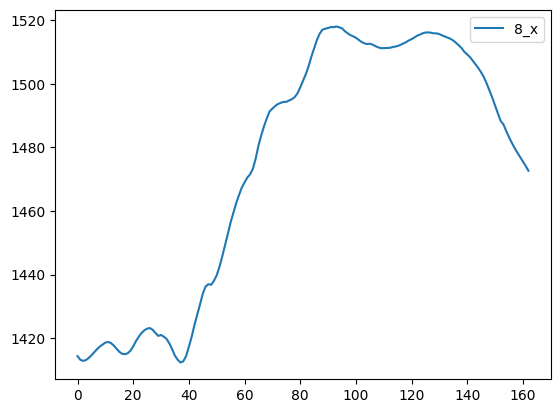

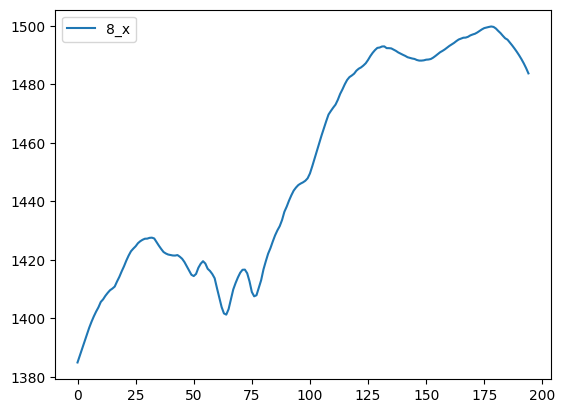

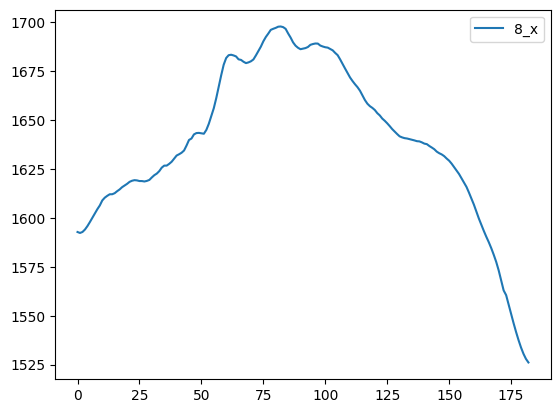

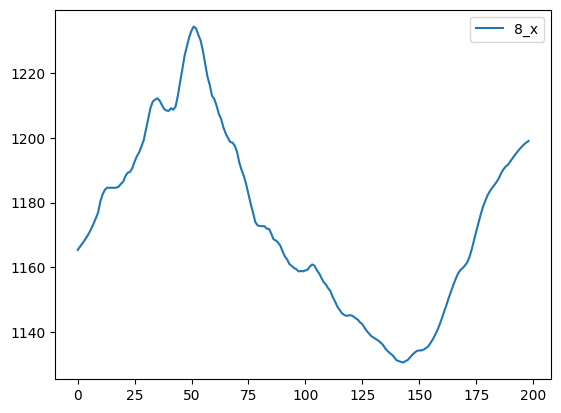

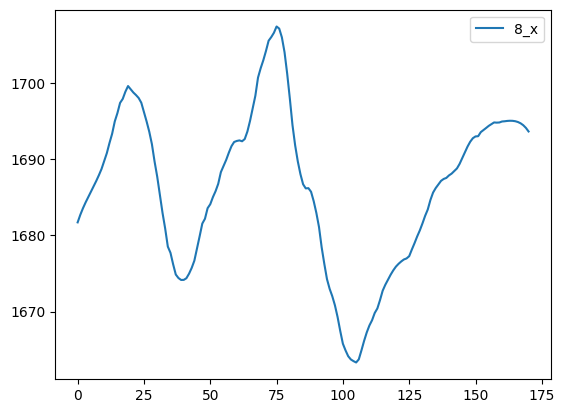

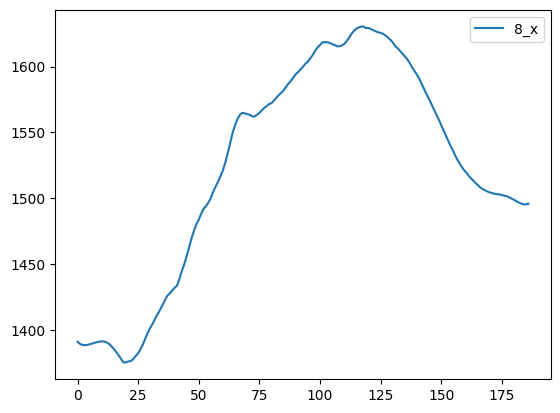

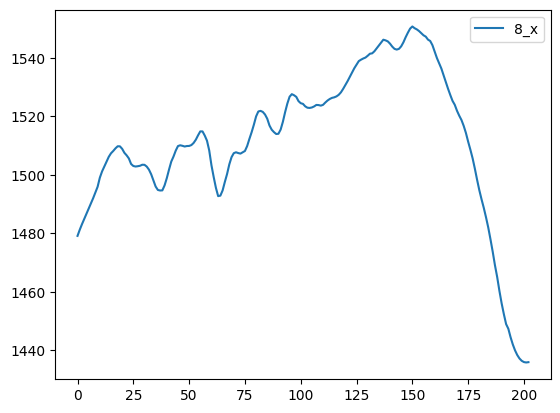

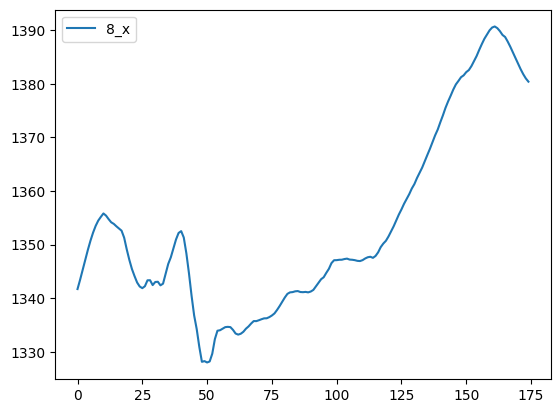

In [14]:
for i in range(len(listStrokesTrain)):
    if i<=15:
        listStrokesTrain[i].plotStroke("8_x")

In [5]:
for stroke in listStrokesTrain:
    stroke.smootheningData()
    stroke.normalize()